In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import pathlib

In [2]:
output_dir = '../results_Mar4/'
pathlib.Path(output_dir).mkdir(exist_ok=True)

In [3]:
granger_df_all_T = pd.read_csv('../results_final_Jan15/granger_draft_T_signed_score.csv', index_col=0)
granger_df_all_T_pvals = pd.read_csv('../results_final_Jan15/granger_draft_T_p.csv', index_col=0)
granger_df_all_T_pvals.index = granger_df_all_T_pvals.index.str.replace('_x', '')
cluster_df = pd.read_csv('../results_final_Jan30/cluster_df_extreme_T_draft.csv', index_col=0)
df_reordered = pd.read_csv('../results_final_Jan30/granger_draft_heatmap_df_reordered.csv', index_col=0)
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

tf_reordered_cluster = pd.DataFrame(index=df_reordered.index)
tf_reordered_cluster['cluster'] = tf_reordered_cluster.index.map(cluster_df['cluster'])
gene_reordered_cluster = pd.DataFrame(index=df_reordered.columns)
gene_reordered_cluster['cluster'] = gene_reordered_cluster.index.map(cluster_df['cluster'])
df_reordered_filtered = df_reordered.copy()

# Create boolean mask for TF clusters > gene clusters using broadcasting
tf_clusters = tf_reordered_cluster['cluster'].values[:, np.newaxis]
gene_clusters = gene_reordered_cluster['cluster'].values
mask = tf_clusters > gene_clusters

# Apply mask to set values to 0 
df_reordered_filtered.values[mask] = 0


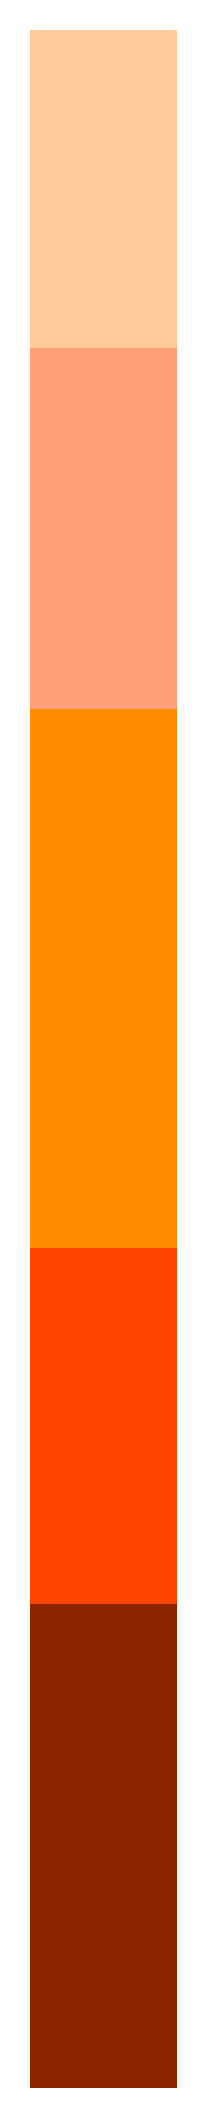

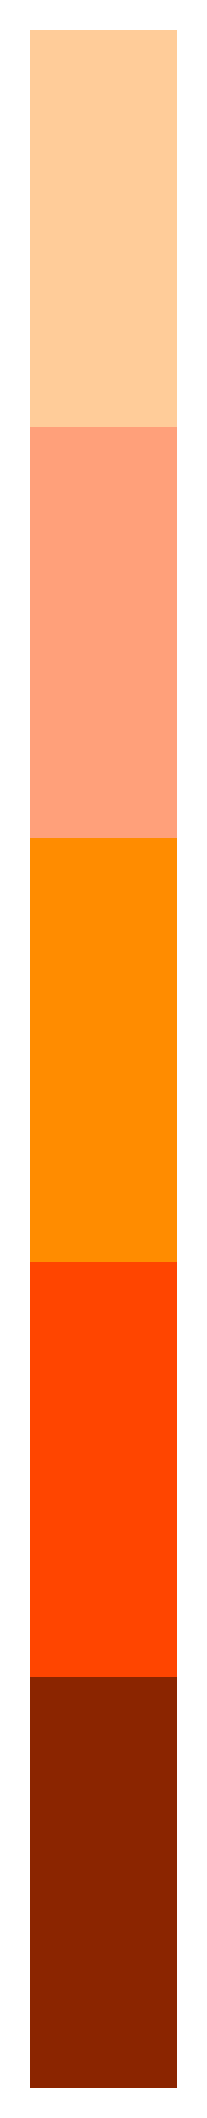

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors

cluster_df_sub = gene_reordered_cluster

# Create a more distinctive color palette for the clusters using darker oranges
custom_oranges = [
    "#FFCC99",  # Light Peach
    "#FFA07A",  # Light Salmon
    "#FF8C00",  # Dark Orange
    "#FF4500",  # Orange Red
    "#8B2500"   # Deep Burnt Orange
]
# Get unique clusters
unique_clusters = cluster_df_sub['cluster'].unique()
cluster_colors = custom_oranges[:len(unique_clusters)]

# Create a colormap from the cluster colors
cluster_cmap = mcolors.ListedColormap(cluster_colors)

# Create just the strip plot
fig_strip = plt.figure(figsize=(0.5, 7))
sns.heatmap(pd.DataFrame(cluster_df_sub['cluster']), cmap=cluster_cmap, 
            cbar=False, yticklabels=False, xticklabels=False)
plt.tight_layout(pad=0.1)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
plt.savefig(f'{output_dir}/gene_strip.pdf', bbox_inches='tight', pad_inches=0.05, dpi=300)




cluster_df_sub = tf_reordered_cluster

# Create a more distinctive color palette for the clusters using darker oranges
custom_oranges = [
    "#FFCC99",  # Light Peach
    "#FFA07A",  # Light Salmon
    "#FF8C00",  # Dark Orange
    "#FF4500",  # Orange Red
    "#8B2500"   # Deep Burnt Orange
]
# Get unique clusters
unique_clusters = cluster_df_sub['cluster'].unique()
cluster_colors = custom_oranges[:len(unique_clusters)]

# Create a colormap from the cluster colors
cluster_cmap = mcolors.ListedColormap(cluster_colors)

# Create just the strip plot
fig_strip = plt.figure(figsize=(0.5, 7))
sns.heatmap(pd.DataFrame(cluster_df_sub['cluster']), cmap=cluster_cmap, 
            cbar=False, yticklabels=False, xticklabels=False)
plt.tight_layout(pad=0.1)
plt.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
plt.savefig(f'{output_dir}/tf_strip.pdf', bbox_inches='tight', pad_inches=0.05, dpi=300)
